In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.1.5'

Taking a look at the Movies dataset
(data shows the movies based on their title and year of release)

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


Taking a look at the Cast dataset
(data shows the cast (actors, actresses, supporting roles) for each movie)

The attribute n basically tells the importance of the cast role, lower the number, more important the role.
Supporting cast usually don't have any value for n

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


Taking a look at the Release dataset
(data shows details of when each movie was released in each country with the release date)

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


Section I - Basic Querying, Filtering and Transformations

What is the total number of movies?

In [9]:
len(movies)

244914

List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
harryP_df = movies[movies.title.str.contains('Harry Potter', case=False)]
harryP_df.sort_values(by=['year'], ascending=False)[:]

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


How many movies were made in the year 2017?

In [14]:
len(movies[movies.year == 2017])

11474

Section I - Q2 : How many movies were made in the year 2015?

In [15]:
len(movies[movies.year == 2015])

8702

Section I - Q3 : How many movies were made from 2000 till 2018?
    You can chain multiple conditions using OR (|) as well as AND (&) depending on the condition

In [16]:
len( movies[(movies.year > 1999) & (movies.year < 2018)] )

106029

Section I - Q4: How many movies are titled "Hamlet"?

In [17]:
hamlet_df = movies[movies.title == 'Hamlet']
len(hamlet_df)

20

Section I - Q5: List all movies titled "Hamlet"
    The movies should only have been released on or after the year 2000
    Display the movies based on the year they were released (earliest to most recent)

In [18]:
hamlet_df = hamlet_df.sort_values(by=['year'], ascending=True)
hamlet_df[hamlet_df.year > 1999]

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
    supporting cast are NOT ranked by an "n" value (NaN)
    check for how to filter based on nulls

In [19]:
inception_df = cast[cast.title == 'Inception']
inception_extras = inception_df.n.isnull()
inception_extras.sum()

27

Section I - Q7: How many roles in the movie "Inception" are of the main cast
    main cast always have an 'n' value

In [20]:
# print(len(inception_df)-inception_extras.sum())
# inception_df.n.notnull().sum()
inception_main = inception_df[inception_df.n.notnull()]
len(inception_main)

51

Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception"
    main cast always have an 'n' value
    remember to sort!

In [21]:
inception_main = inception_main.sort_values(by=['n'], ascending=True)
inception_main[['name','n']].head(10)

,name,n
590576,Leonardo DiCaprio,1.0
859993,Joseph Gordon-Levitt,2.0
3387147,Ellen Page,3.0
940923,Tom Hardy,4.0
2406531,Ken Watanabe,5.0
1876301,Dileep Rao,6.0
1615709,Cillian Murphy,7.0
183937,Tom Berenger,8.0
2765969,Marion Cotillard,9.0
1826027,Pete Postlethwaite,10.0


Section I - Q9:
    (A) List all movies where there was a character 'Albus Dumbledore'
    (B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
        For Part (B) remember the same actor might play the same role in multiple movies

In [22]:
dumbledore_df = cast[cast.character.str.contains('Albus Dumbledore', case=False)]
dumbledore_df

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792419,Harry Potter and the Deathly Hallows: Part 1,2010,Michael Gambon,actor,Professor Albus Dumbledore,39.0
792420,Harry Potter and the Deathly Hallows: Part 2,2011,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792422,Harry Potter and the Half-Blood Prince,2009,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN


In [23]:
print(dumbledore_df.name.unique())

['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Toby Regbo' 'Timothy Tedmanson']


Section I - Q10:
    (A) How many roles has 'Keanu Reeves' played throughout his career?
    (B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [24]:
keanu_df = cast[cast.name.str.contains('Keanu Reeves', case=False)]
len(keanu_df)

62

In [25]:
keanu_df[(keanu_df.year > 1998) & (keanu_df.n.notnull())].sort_values('year', ascending=True)

,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0


Section I - Q11:
    (A) List the total number of actor and actress roles available from 1950 - 1960
    (B) List the total number of actor and actress roles available from 2007 - 2017

In [26]:
len( cast[(cast.year > 1949) & (cast.year < 1961)] )

234635

In [27]:
len( cast[(cast.year > 2006) & (cast.year < 2018)] )

1452413

Section I - Q12:
    (A) List the total number of leading roles available from 2000 to present
    (B) List the total number of non-leading roles available from 2000 - present (exclude support cast)
    (C) List the total number of support\extra-credit roles available from 2000 - present

In [28]:
# leading roles (n <= 10)
len( cast[(cast.year > 1999) & (cast.n < 11)] )

461385

In [29]:
# non-leading roles (n > 10)
len( cast[(cast.year > 1999) & (cast.n > 10)] )

600893

In [30]:
# extras
len( cast[(cast.year > 1999) & (cast.n.isnull())] )

887484

Section II - Aggregations, Transformations and Visualizations
What are the top ten most common movie names of all time?

In [31]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Temptation              12
Maya                    12
Othello                 11
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Name: title, dtype: int64

Plot the top ten common movie names of all time

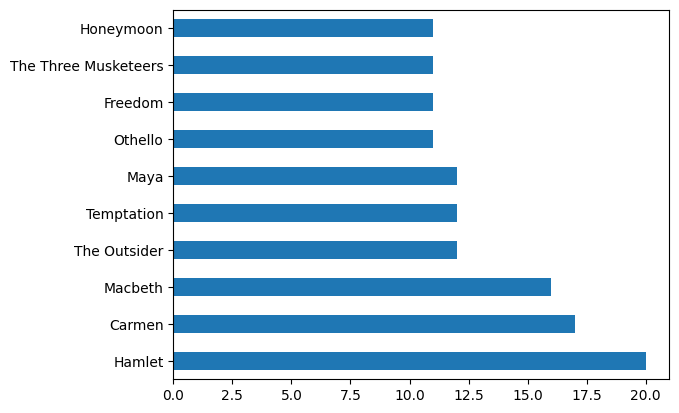

In [32]:
top_ten.plot(kind='barh') ; 

Section II - Q1: Which years in the 2000s saw the most movies released? (Show top 3)

In [33]:
cent21_movies = movies[movies.year > 1999]

def count_rows(df):
    return len(df)
    
by_year = cent21_movies.groupby('year').apply(count_rows)
type(by_year)
by_year = by_year.sort_values(ascending=False)
by_year.head(3)

year
2017    11474
2016     9440
2015     8702
dtype: int64

Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
    Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
    You might need to sort before plotting

''

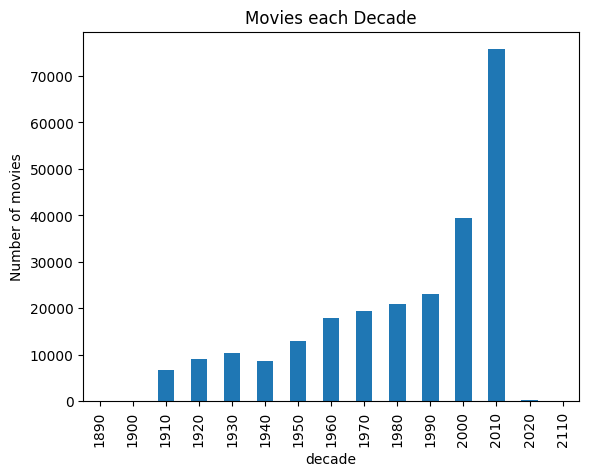

In [34]:
# make a new decade column
import numpy as np

#def get_decade(x):
    #return ( np.floor(x/10) * 10 ).astype(np.int64)
#movies['decade'] = movies.year.apply(get_decade)

movies['decade'] = ( np.trunc(movies.year / 10) * 10 ).astype(np.int64)
by_decade = movies.groupby('decade').apply(count_rows)
by_decade.plot(kind='bar')
plt.ylabel('Number of movies')
plt.title('Movies each Decade')
# comment: some movies have mislabeled years (ex. 2110s from 2115)
;

Section II - Q3:
    (A) What are the top 10 most common character names in movie history?
    (B) Who are the top 10 people most often credited as "Herself" in movie history?
    (C) Who are the top 10 people most often credited as "Himself" in movie history?

In [35]:
# most common character names
cast.character.value_counts().iloc[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [36]:
# played by herself
herself = cast[ cast.character.str.contains('herself', case=False) ]
herself.name.value_counts().iloc[:10]

Queen Elizabeth II                  18
Jacqueline Kennedy                  12
Margaret Thatcher                   10
Joyce Brothers                      10
Mar?a Luisa (V) Mart?n               9
Luisa Horga                          9
Hillary Clinton                      9
Pat Nixon                            8
Queen Elizabeth the Queen Mother     7
Caroline Kennedy                     7
Name: name, dtype: int64

In [37]:
# play by himself
himself = cast[ cast.character.str.contains('himself', case=False) ]
himself.name.value_counts().iloc[:10]

Adolf Hitler             115
Richard Nixon             54
John F. Kennedy           49
Ronald Reagan             46
George W. Bush            28
Winston Churchill         28
Benito Mussolini          26
Martin Luther King        26
Franklin D. Roosevelt     25
Bill Clinton              23
Name: name, dtype: int64

Section II - Q4:
    (A) What are the top 10 most frequent roles that start with the word "Zombie"?
    (B) What are the top 10 most frequent roles that start with the word "Police"?
    Hint: The startswith() function might be useful

In [38]:
# zombie roles
zombie = cast[cast.character.str.startswith('Zombie')]
zombie.character.value_counts()[:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [39]:
# police roles
police = cast[cast.character.str.startswith('Police')]
police.character.value_counts()[:10]

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

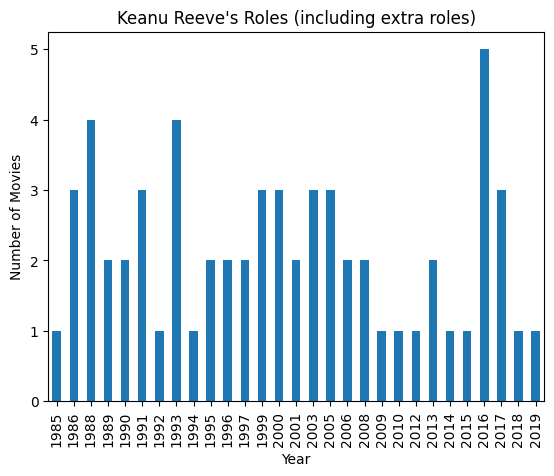

In [40]:
# using same keanu_df we computed earlier
keanu_year = keanu_df.year.value_counts()

# sort by year
keanu_year = keanu_year.sort_index() 

# plot 
keanu_year.plot(kind='bar')
plt.ylabel('Number of Movies')
plt.xlabel('Year')
plt.title('Keanu Reeve\'s Roles (including extra roles)') ;

Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.

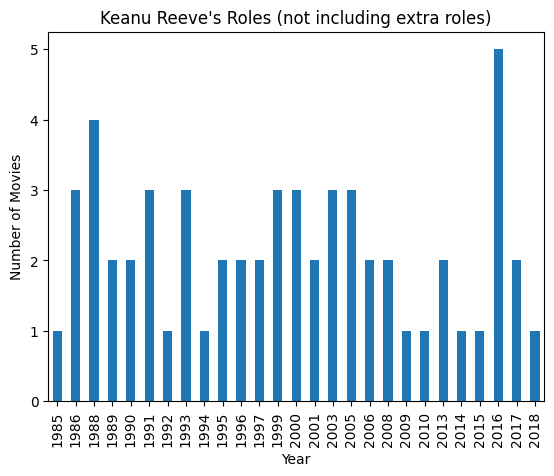

In [41]:
# using same keanu_df we computed earlier
keanu_cast = keanu_df[keanu_df.n.notnull()]
keanu_year = keanu_cast.year.value_counts()

# sort by year
keanu_year = keanu_year.sort_index() 

# plot 
keanu_year.plot(kind='bar')
plt.ylabel('Number of Movies')
plt.xlabel('Year')
plt.title('Keanu Reeve\'s Roles (not including extra roles)') ;

Section II - Q7: Plot the number of "Hamlet" films made by each decade

Text(0.5, 1.0, 'Number of Hamlet movies')

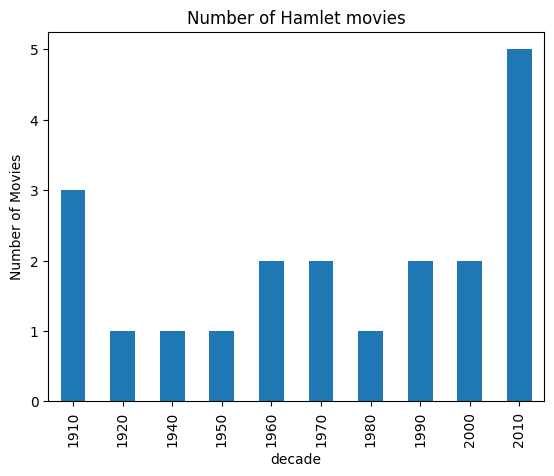

In [42]:
# using same hamlet_df from earlier
# add a new 'decade' column
hamlet_df['decade'] = ( np.trunc(hamlet_df.year / 10) * 10 ).astype(np.int64)
hamlet_decade = hamlet_df.groupby('decade').apply(count_rows)
hamlet_decade.plot(kind='bar')
plt.ylabel('Number of Movies')
plt.title('Number of Hamlet movies')

Section II - Q8:
    (A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?
    (B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?
    Hint: A specific value of n might indicate a leading role

In [43]:
# Assuming leading roles have n <= 10
# make a new 'decade' column in the cast df
cast['decade'] = ( np.trunc(cast.year / 10) * 10 ).astype(np.int64)

In [44]:
# 1960's leading roles
len(cast[ (cast.decade == 1960) & (cast.n < 11) ])

86122

In [45]:
# early 2000's leading roles
len(cast[ (cast.decade == 2000) & (cast.n < 11) ])

204299

Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [46]:
frank_oz = cast[ cast.name.str.contains('Frank Oz', case=False) ]
frank_oz = frank_oz.sort_values('year', ascending=True)

#print( frank_oz.groupby('title').size() )
#print( frank_oz.title.value_counts() )

# https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html
frank_oz2 = frank_oz[frank_oz.title.duplicated(keep=False)]
# https://pandas.pydata.org/docs/reference/api/pandas.Series.drop_duplicates.html
frank_oz2 = frank_oz2[['title', 'year']].drop_duplicates()
print(frank_oz2)

                                        title  year
1723645                      The Muppet Movie  1979
1723637                The Great Muppet Caper  1981
1723599        An American Werewolf in London  1981
1723630                      The Dark Crystal  1982
1723659            The Muppets Take Manhattan  1984
1723602                      Follow That Bird  1985
1723638            The Muppet Christmas Carol  1992
1723611                Muppet Treasure Island  1996
1723612                    Muppets from Space  1999
1723627  The Adventures of Elmo in Grouchland  1999


Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [47]:
#frank_oz.character.value_counts()

# https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html
frank_oz3 = frank_oz[frank_oz.character.duplicated(keep=False)]
# https://pandas.pydata.org/docs/reference/api/pandas.Series.drop_duplicates.html
frank_oz3 = frank_oz3['character'].drop_duplicates()
print(frank_oz3)

1723645        Miss Piggy
1723648     Sam the Eagle
1723647            Animal
1723646       Fozzie Bear
1723621              Yoda
1723657    Cookie Monster
1723656              Bert
1723603            Grover
Name: character, dtype: object


Section III - Advanced Merging, Querying and Visualizations

Make a bar plot with the following conditions
    Frequency of the number of movies with "Christmas" in their title
    Movies should be such that they are released in the USA.
    Show the frequency plot by month

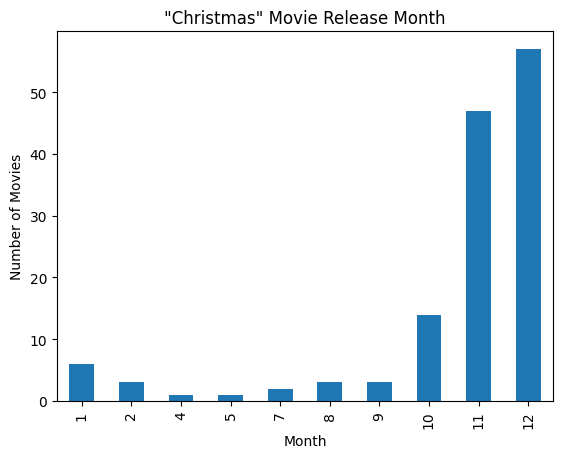

In [48]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar') 
plt.title('\"Christmas\" Movie Release Month')
plt.ylabel('Number of Movies')
plt.xlabel('Month') ;

Section III - Q1: Make a bar plot with the following conditions
    Frequency of the number of movies with "Summer" in their title
    Movies should be such that they are released in the USA.
    Show the frequency plot by month

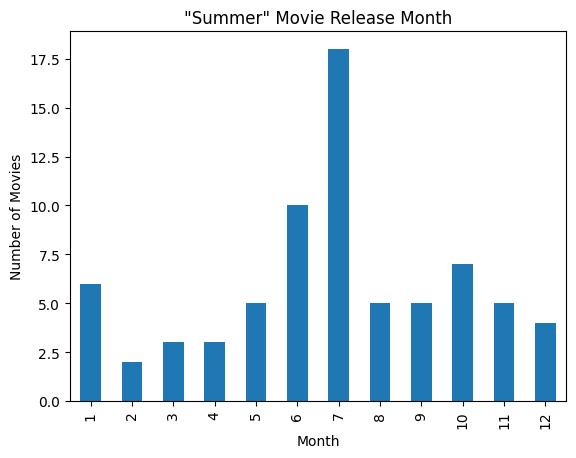

In [49]:
summer = release_dates[(release_dates.title.str.contains('Summer', case=False)) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar') 
plt.title('\"Summer\" Movie Release Month')
plt.ylabel('Number of Movies')
plt.xlabel('Month') ;

Section III - Q2: Make a bar plot with the following conditions
    Frequency of the number of movies with "Action" in their title
    Movies should be such that they are released in the USA.
    Show the frequency plot by week

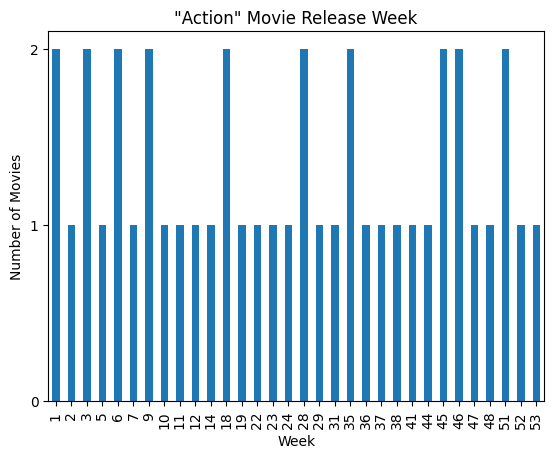

In [50]:
action = release_dates[(release_dates.title.str.contains('Action', case=False)) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar') 
plt.yticks(np.arange(0, 3, step=1))  
plt.title('\"Action\" Movie Release Week')
plt.ylabel('Number of Movies')
plt.xlabel('Week') ;

Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role 
                  along with their release date in the USA sorted by the date of release
    Hint: You might need to join or merge two datasets!

In [51]:
# assuming lead role means n=1

# merge keanu_df with release_dates df (for USA release date)
keanu_merge = pd.merge(keanu_df, release_dates[release_dates.country == 'USA'], how='inner')
#print(keanu_df.columns)
keanu_merge[ keanu_merge.n < 2 ].sort_values('date')

# note: excluding movies with NaN 'country' 

#print(len(keanu_df))
#print(release_dates.info())

,title,year,name,type,character,n,country,date
41,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
4,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
3,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
20,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
27,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
17,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
2,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
5,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
11,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13
33,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,USA,1997-10-17


Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

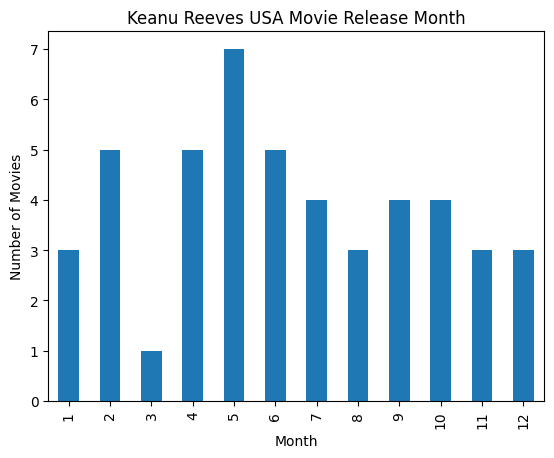

In [52]:
keanu_merge.date.dt.month.value_counts().sort_index().plot(kind='bar') 
plt.title('Keanu Reeves USA Movie Release Month')
plt.ylabel('Number of Movies')
plt.xlabel('Month') ;
# note: including non-lead roles

Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

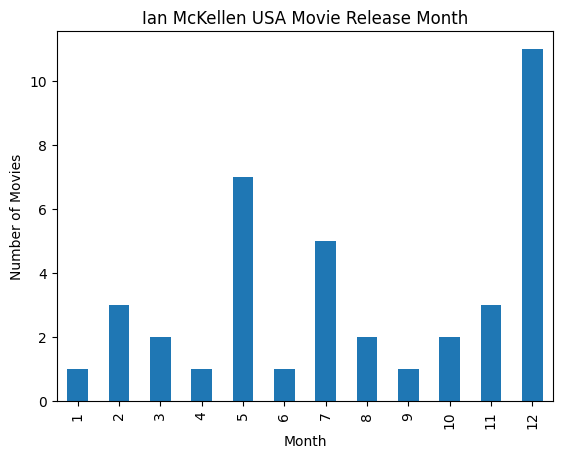

In [53]:
gandalf = cast[ cast.name.str.contains('Ian McKellen', case=False)]

# merge with release_dates df (for USA release date)
gandalf_merge = pd.merge(gandalf, release_dates[release_dates.country == 'USA'], how='inner')
#print(gandalf_merge.columns)
#gandalf_merge

gandalf_merge.date.dt.month.value_counts().sort_index().plot(kind='bar') 
plt.title('Ian McKellen USA Movie Release Month')
plt.ylabel('Number of Movies')
plt.xlabel('Month') ;